In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris.shape

(150, 5)

In [7]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

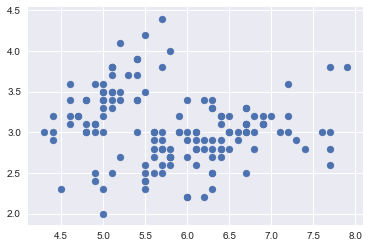

In [8]:
plt.scatter(iris.sepal_length, iris.sepal_width)

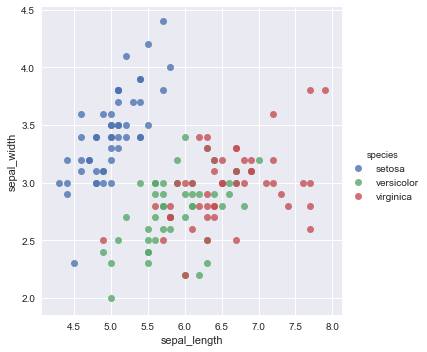

In [9]:
sns.lmplot('sepal_length','sepal_width',data=iris, hue='species',fit_reg=False,)

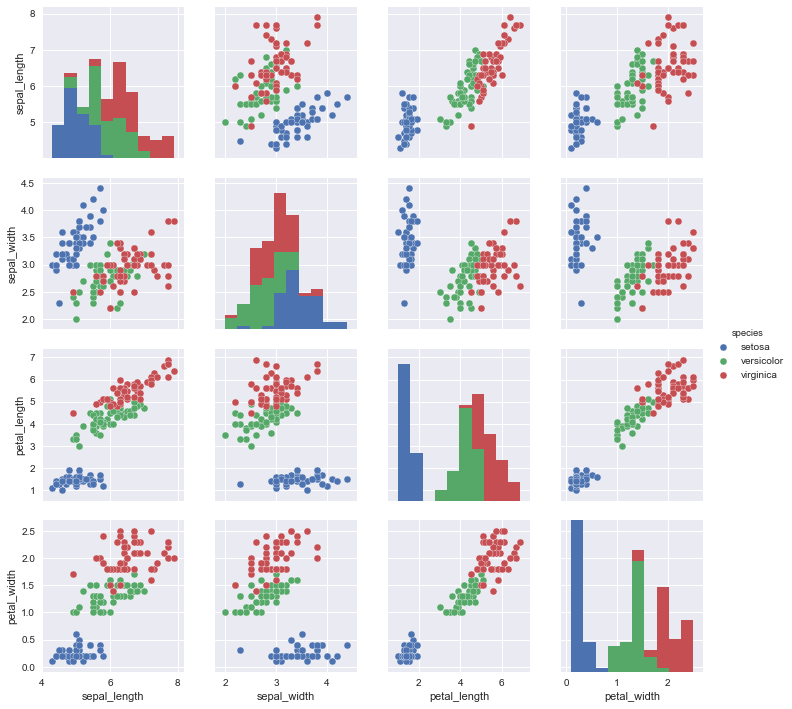

In [10]:
sns.pairplot(iris, hue='species')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = iris.iloc[:,0:4]

In [13]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [14]:
y = iris.iloc[:,4]

In [15]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123) #, stratify=y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
tree = DecisionTreeClassifier()

In [26]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
y_pred = tree.predict(X_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [29]:
classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n     setosa       1.00      1.00      1.00        18\n versicolor       0.83      1.00      0.91        10\n  virginica       1.00      0.88      0.94        17\n\navg / total       0.96      0.96      0.96        45\n'

In [30]:
(y_test==y_pred).value_counts()

True     43
False     2
Name: species, dtype: int64

In [31]:
tree.score(X_test,y_test)

0.9555555555555556

## Using Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [35]:
y_pred_rf = rf.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred_rf)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

In [37]:
rf.score(X_test,y_test)

0.9555555555555556

In [38]:
classification_report(y_test,y_pred_rf)

'             precision    recall  f1-score   support\n\n     setosa       1.00      1.00      1.00        18\n versicolor       0.83      1.00      0.91        10\n  virginica       1.00      0.88      0.94        17\n\navg / total       0.96      0.96      0.96        45\n'

In [39]:
print(type(y))
print(type(y_test))
print(type(y_pred_rf))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


## Using Gradint Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbm = GradientBoostingClassifier()

In [42]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [43]:
y_pred_gbm = gbm.predict(X_test)

In [44]:
confusion_matrix(y_test, y_pred_gbm)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  4, 13]])

In [45]:
gbm.score(X_test,y_test)

0.91111111111111109

In [46]:
classification_report(y_test,y_pred_gbm)

'             precision    recall  f1-score   support\n\n     setosa       1.00      1.00      1.00        18\n versicolor       0.71      1.00      0.83        10\n  virginica       1.00      0.76      0.87        17\n\navg / total       0.94      0.91      0.91        45\n'

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
svc = SVC()

In [49]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred_svc = svc.predict(X_test)

In [51]:
confusion_matrix(y_test,y_pred_svc)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 16]])

In [52]:
classification_report(y_test,y_pred_svc)

'             precision    recall  f1-score   support\n\n     setosa       1.00      1.00      1.00        18\n versicolor       0.91      1.00      0.95        10\n  virginica       1.00      0.94      0.97        17\n\navg / total       0.98      0.98      0.98        45\n'

In [53]:
svc.score(X_test,y_test)

0.97777777777777775